## to add
- ~~look at frequencies found around peak volume (more than just two, see what optimal number is)
- ~~remove points at the two ends of the spectrum, they are not going to be right at the peak
    - this will reduce the number of false peaks found, and we can get the two tallest peaks
    - then take the difference in frequency between the two tallest peaks (and maybe the height percentage)
    - this should add infromation that just the peak location will not provide
- top two frequencies from each specrtum
- check the power in each frequency-band
- if same birds keep getting mis-identified (due to similar frequencies) just classify them into a single group
- apply filter to groups
    -determine filter level based on whether the background frequency up to a certain band is there for the entire signal!!!!
- cast the signal into a different sample rate, see if it gets better/differnt results
- maybe use flatness locator from librosa


if same binning for the differnt transform types (i.e. the 'loudest point')
- extract the different features from each of the spectra at that bin location
- Q: to use all of the cepstral coefficients? or just the 'most important'?
    - how to know what the most important cepstralcoefficients are?
    

librosa produces 320 bins by defaults (this depends of sample rate?) (44100) -> (125)
48000 -> (136 bins)

- peak spacing in rms peaks
- get prominent frequency for torch mel spectrogram
- distance between volume peaks in mrel spec
- number of peaks in rms spcrum?

turn off ~~smart~~ *dumb* complete

In [74]:
#I want a manual transmission, not an automatic...
# Run this in Python once, it should take effect permanently (change to False to None to revert)
from notebook.services.config import ConfigManager
c = ConfigManager()
c.update('notebook', {"CodeCell": {"cm_config": {"autoCloseBrackets": False}}})

{'Notebook': {'Toolbar': True, 'Header': True},
 'CodeCell': {'cm_config': {'autoCloseBrackets': False}}}

all about birds suggests that most cals are betweem 1000 and 8000 Hz
- filter out calls below 400 Hz to start, and see what the effect is.
- in mel freq filter below 500 Hz
achieve the filtering by setting all rows lower than a certain value to zero in the stft array

In [5]:
import os
cwd = os.getcwd()
path =  os.path.join( cwd, 'cutclips' )
files = [f for f in os.listdir( path )]

n = 643
file = files[n]
filename = os.path.join( path, file )
#filename = '/home/chris/Documents/Insight2020/examples/cutclips/Scarlet Tanager_2_0.wav' #temp ovveride for pres
filename = 'Scarlet Tanager_2_0.wav'

In [4]:
fileIwant = [(i,f) for i,f in enumerate(files) if f=='Scarlet Tanager_2_0.wav']
files

['American Goldfinch_48_2.wav',
 'American Robin_40_3.wav',
 'American Goldfinch_62_23.wav',
 'Blue Jay_166_0.wav',
 'American Crow_19_5.wav',
 'American Robin_40_12.wav',
 'Blue Jay_74_1.wav',
 'Carolina Chickadee_81_3.wav',
 'American Crow_62_6.wav',
 'American Robin_6_1.wav',
 'American Robin_10_5.wav',
 'American Robin_72_23.wav',
 'Brown-headed Cowbird_19_2.wav',
 'Blue Jay_56_8.wav',
 'American Crow_13_3.wav',
 'Canada Goose_18_20.wav',
 'American Robin_107_1.wav',
 'American Robin_110_0.wav',
 'Blue Jay_51_2.wav',
 'American Robin_5_7.wav',
 'Blue Jay_88_2.wav',
 'American Goldfinch_0_14.wav',
 'Blue Jay_42_0.wav',
 'American Goldfinch_26_8.wav',
 'Carolina Chickadee_66_2.wav',
 'Eastern Bluebird_37_4.wav',
 'American Robin_55_0.wav',
 'Carolina Chickadee_85_6.wav',
 'American Goldfinch_35_10.wav',
 'American Goldfinch_25_1.wav',
 'Blue Jay_31_2.wav',
 'American Robin_39_3.wav',
 'American Crow_66_13.wav',
 'American Robin_93_10.wav',
 'American Robin_39_1.wav',
 'Canada Goose_2

In [6]:
import torchaudio
import numpy as np
import scipy
import matplotlib.pyplot as plt
from scipy.signal import find_peaks, peak_prominences
import librosa
import librosa.display


In [7]:
def Normalize(tensor):
    # Subtract the mean, and scale to the interval [-1,1]
    tensor_minusmean = tensor - tensor.mean()
    return tensor_minusmean/tensor_minusmean.abs().max()

In [8]:
#load the file, create a numpy array version so librosa can process it
wf, sr = torchaudio.load( filename )
#wf_rs = torchaudio.transforms.Resample( orig_freq=16000, new_freq=8000 )(wf)
wf_np = np.asfortranarray( wf[0].numpy() )
spectrogram = torchaudio.transforms.Spectrogram()( wf )
yn = Normalize( wf )
y = np.asfortranarray( yn[0].numpy() ) #wf[0].numpy() )

#cpmpute the spectrograms of the data
S, phase = librosa.magphase(librosa.stft(wf_np))
Sn, phase = librosa.magphase(librosa.stft(y))

yn.shape, y.shape, type( y ), sr

(torch.Size([1, 63945]), (63945,), numpy.ndarray, 44100)

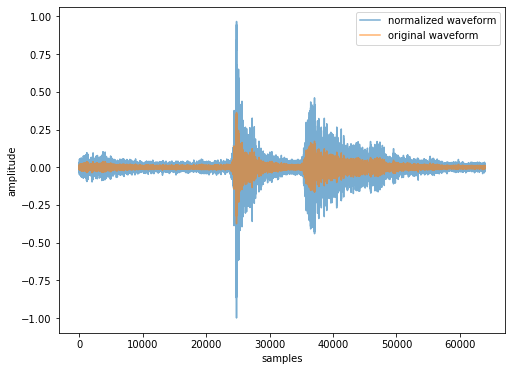

In [20]:
#plot the original spectrum, and the normalized version
f,ax = plt.subplots( figsize=(8,6) )
ax.plot( y, alpha=0.6, label='normalized waveform' );
ax.plot( wf_np, alpha=0.6, label='original waveform' );
#ax.plot( np.asfortranarray( wf_rs[0].numpy() ), alpha=0.6, label='original wf' );

#ax.plot( yr, alpha=0.6, label='recronstructed wf' );
ax.set_xlabel('samples')
ax.set_ylabel('amplitude')
ax.legend()

In [21]:
def FindPeaks(x, ax, output=True):
    peaks, _ = find_peaks(x, height=0.3*max(x), distance=5, width=3)
    prominences = peak_prominences(x, peaks)[0]
    contour_heights = x[peaks] - prominences
    ax.plot(peaks, x[peaks], "x")
    ax.vlines(x=peaks, ymin=contour_heights, ymax=x[peaks])
    #end peak finding
    #...just use max for now
    print(peaks, x[peaks])
    peak_order = sorted( zip( peaks, x[peaks] ), key=lambda l: l[1], reverse=True) 
    print(peak_order)#, x[ list(peak_order[0,:]) ])
    
    #plt.show()
    return peak_order #peaks, x[peaks]

[49 72] [0.07869092 0.06822772]
[(49, 0.078690924), (72, 0.06822772)]


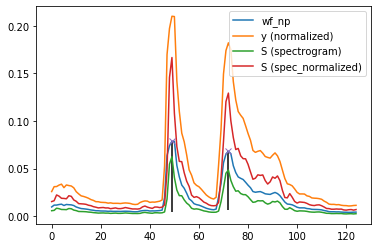

rms shape (1, 125)


(0.016787816, 0.044776592, 0.009964237779511519, 0.02657668553436051)

In [22]:
rms = librosa.feature.rms(y=wf_np)
rmsN = librosa.feature.rms(y=y)
rmsS = librosa.feature.rms(S=S)
rmsSn = librosa.feature.rms(S=Sn)

f,ax = plt.subplots()
ax.plot( rms[0], label='wf_np' )
ax.plot( rmsN[0], label='y (normalized)' )
ax.plot( rmsS[0], label='S (spectrogram)' )
ax.plot( rmsSn[0],  label='S (spec_normalized)')
ax.legend()

FindPeaks( rms[0], ax=ax )
#FindPeaks( rmsN[0], ax=ax )
plt.show()

print('rms shape', rms.shape )

np.average( rms ), np.average( rmsN ), np.average( rmsS ), np.average( rmsSn )

In [23]:
cepstral = librosa.feature.mfcc(y, sr)

for i in range(20):
    plt.plot(cepstral[i], label=i)
plt.legend()
    

cepstral.shape, np.average(cepstral[0]), np.average(cepstral[1]), np.average(cepstral[2])

((20, 125), -252.49728, 29.446558, -88.69521)

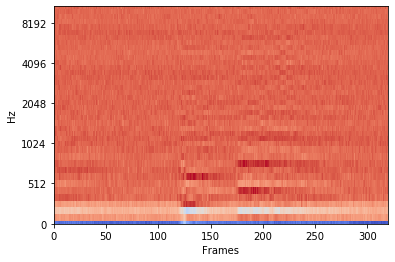

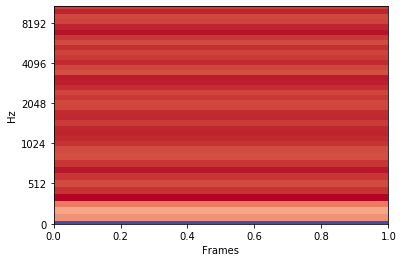

(torch.Size([1, 40, 320]), torch.Tensor, (40, 320), array([[-347.89465   ],
        [ -67.16831   ],
        [ -85.84919   ],
        [ -47.486122  ],
        [  18.646036  ],
        [   1.4303825 ],
        [ -13.656275  ],
        [  -0.8168374 ],
        [  12.169139  ],
        [  -0.63354754],
        [ -15.365079  ],
        [ -13.604169  ],
        [   1.3016009 ],
        [   4.43459   ],
        [   8.040108  ],
        [   5.9521766 ],
        [  -4.117822  ],
        [   7.1247873 ],
        [   4.4882774 ],
        [  -9.002988  ],
        [ -10.526113  ],
        [  -1.5229428 ],
        [  -8.855993  ],
        [   3.1245544 ],
        [   9.890716  ],
        [  10.219231  ],
        [ -16.286312  ],
        [  -8.647612  ],
        [   5.2592235 ],
        [  -3.497266  ],
        [  -8.355122  ],
        [   2.0725384 ],
        [ -12.859078  ],
        [  -2.2617931 ],
        [  13.024687  ],
        [   7.643574  ],
        [  -8.330649  ],
        [ -10.416345  ],

In [24]:
mfcc = torchaudio.transforms.MFCC( sample_rate=sr)(wf)


mfcc_np = mfcc.detach().numpy()[0]
librosa.display.specshow(mfcc_np, y_axis='mel', x_axis='frames');#,x_axis='time'
plt.show()
librosa.display.specshow(mfcc_np[:,:1], sr=sr, y_axis='mel', x_axis='frames');
plt.show()
mfcc.shape, type(mfcc), mfcc_np.shape, mfcc_np[:,:1]


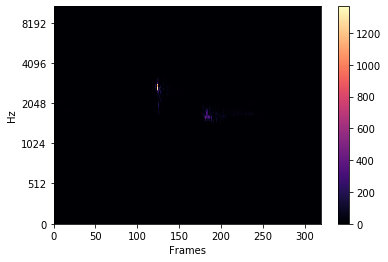

<Figure size 432x288 with 0 Axes>

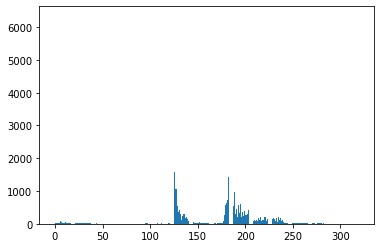

torch.Size([1, 128, 320])

In [31]:
from matplotlib.colors import LogNorm
import pandas as pd

mel_specgram = torchaudio.transforms.MelSpectrogram(sr)(yn)#(wf)
#plt.imshow( mel_specgram.detach().numpy()[0], norm=LogNorm() )

mel_np = mel_specgram.detach().numpy()[0]
mel_db = librosa.core.amplitude_to_db( mel_np )
librosa.display.specshow(mel_np, y_axis='mel', x_axis='frames', )#,x_axis='time'
plt.colorbar()
plt.show()

plt.figure()#figsize=(10,8))
librosa.display.specshow(mel_db, y_axis='mel', x_axis='frames', )#,x_axis='time'
plt.title('Mel-frequencty Spectrogram')
plt.colorbar(format='%+2.0f dB')
amp, freq = mel_np.sum(0), mel_np.sum(1)
plt.show()
plt.figure()
#ax = plt.subplot(2,1,1)
plt.plot(amp, '.-', label='sum of amplitudes')
plt.figure()
#ax = plt.subplot(2,1,2)
f,ax = plt.subplots()
ax.set_title('sum along frequency axis')
ax.plot(freq, '.-', label='sum of frequencies')
ax.set_xlabel('frequency (Hz)')
ax.set_ylabel('occurrences')
plt.legend()
plt.show()
#hdata = list(zip( range(len(amp)), amp ))

plt.bar( range(len(amp)), amp )
plt.show()
plt.bar( range(len(freq)), freq )
mel_specgram.shape

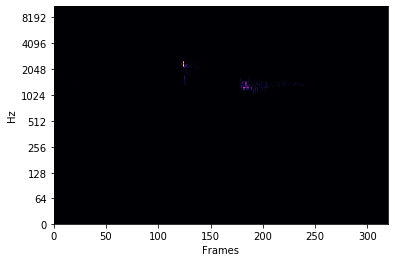

array([[2.14484666e-04, 8.09784342e-06, 1.00306188e-05, ...,
        1.30780645e-05, 4.99967337e-06, 6.77043090e-07],
       [4.94964625e-05, 2.21064736e-04, 1.13090995e-04, ...,
        3.56389282e-05, 3.49994589e-05, 2.94256406e-05],
       [5.07070836e-05, 6.94813440e-04, 1.81513606e-04, ...,
        8.61134613e-05, 1.48882216e-04, 1.38501200e-04],
       ...,
       [8.87296337e-04, 1.39490026e-03, 3.07310329e-05, ...,
        2.21254202e-04, 1.04666746e-03, 6.30229362e-04],
       [3.35780962e-04, 1.52133650e-03, 7.79124434e-07, ...,
        7.49759420e-05, 2.06330486e-04, 8.26188989e-05],
       [8.48132549e-05, 1.18585187e-03, 9.30686070e-08, ...,
        6.66081978e-05, 5.04238096e-06, 1.43593599e-04]], dtype=float32)

In [32]:
spec_np = spectrogram.detach().numpy()[0]
librosa.display.specshow(spec_np, y_axis='log', x_axis='frames')#,x_axis='time'
plt.show()
spec_np

background filtering using mel-spectrogram

In [33]:
flatness = librosa.feature.spectral_flatness(y=wf_np)
flatnessN = librosa.feature.spectral_flatness(y=y)
flatnessS = librosa.feature.spectral_flatness(S=S)
flatnessSn = librosa.feature.spectral_flatness(S=Sn)

f,ax = plt.subplots()
ax.plot( flatness[0], label='wf_np' )
ax.plot( flatnessN[0], label='y (normalized)' )
ax.plot( flatnessS[0], label='S (spectrogram)' )
ax.plot( flatnessSn[0],  label='S (spec_normalized)')
ax.legend()
plt.show()

np.average( flatness ), np.average( flatnessN ), np.average( flatnessS ), np.average( flatnessSn )
#same for norm and non-norm versions

(0.06293269, 0.06233469, 0.06293269, 0.06233469)

In [34]:
spec_contrast = librosa.feature.spectral_contrast( wf_np, sr )
spec_contrastN = librosa.feature.spectral_contrast( y, sr )
spec_contrastS = librosa.feature.spectral_contrast( S=S, sr=sr )
spec_contrastSn = librosa.feature.spectral_contrast( S=Sn, sr=sr )

f,ax = plt.subplots()
plt.plot( spec_contrast[0], label='wf_np' )
ax.plot( spec_contrastN[0], label='y (normalized)' )
ax.plot( spec_contrastS[0], label='S (spectrogram)' )
ax.plot( spec_contrastSn[0],  label='S (spec_normalized)')
ax.legend()
plt.show()

np.average( spec_contrast ), np.average( spec_contrastN ), np.average( spec_contrastS ), np.average( spec_contrastSn )
#same for norm and non-norm versions

(14.887828285420866, 15.16519359255165, 14.887828285420866, 15.16519359255165)

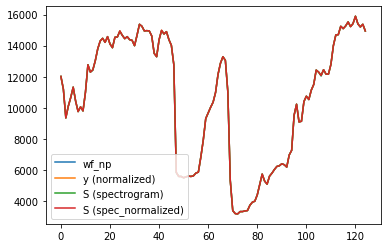

(10646.36015625, 10647.39375, 10646.36015625, 10647.39375)

In [35]:
rolloff = librosa.feature.spectral_rolloff(y=wf_np, sr=sr)
rolloffN = librosa.feature.spectral_rolloff(y=y, sr=sr)
rolloffS = librosa.feature.spectral_rolloff(S=S, sr=sr)
rolloffSn = librosa.feature.spectral_rolloff(S=Sn, sr=sr)

f,ax = plt.subplots()
ax.plot( rolloff[0], label='wf_np' )
ax.plot( rolloffN[0], label='y (normalized)' )
ax.plot( rolloffS[0], label='S (spectrogram)' )
ax.plot( rolloffSn[0],  label='S (spec_normalized)')
ax.legend()
plt.show()

np.average( rolloff ), np.average( rolloffN ), np.average( rolloffS ), np.average( rolloffSn )

peak list [49 72]
[49 72] [1.02860312 0.43999003]
[(49, 1.0286031194336758), (72, 0.43999002986999985)]


[(49, 1.0286031194336758), (72, 0.43999002986999985)]

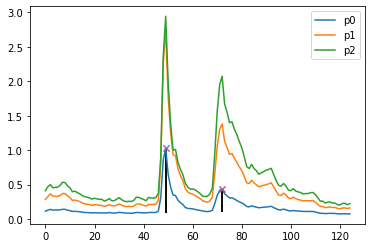

In [36]:
p0 = librosa.feature.poly_features(S=S, sr=sr, order=0)
p1 = librosa.feature.poly_features(S=S, sr=sr, order=1)
p2 = librosa.feature.poly_features(S=S, sr=sr, order=2)

f,ax = plt.subplots()
plt.plot( p0[0], label='p0' )
plt.plot( p1[1], label='p1'  )
plt.plot( p2[2], label='p2'  )
ax.legend()

x = p0[0]
peaks, _ = find_peaks(x, height=0.4*max(x), distance=10) #, prominence=5
print('peak list', peaks)
prominences = peak_prominences(x, peaks)[0]
contour_heights = x[peaks] - prominences
plt.plot( peaks, x[peaks], "x")
plt.vlines(x=peaks, ymin=contour_heights, ymax=x[peaks])

FindPeaks(x=p0[0], ax=ax)

M shape (128, 125)


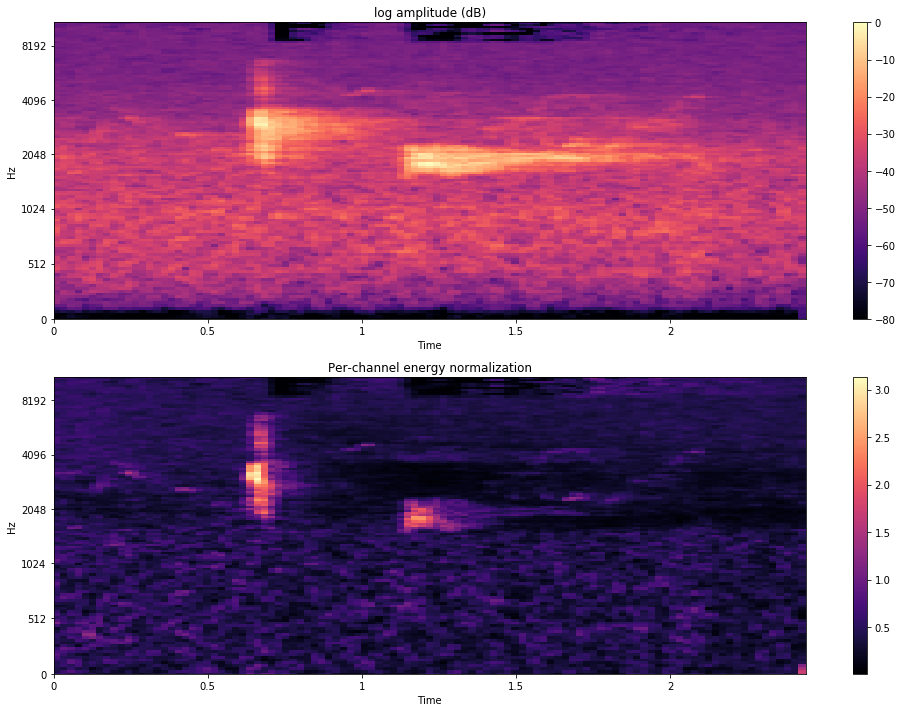

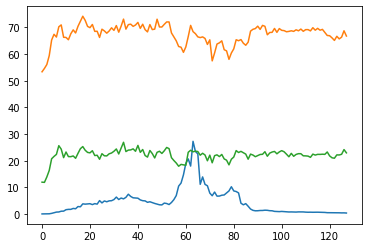

In [37]:
# We recommend scaling y to the range [-2**31, 2**31[ before applying
# PCEN's default parameters. Furthermore, we use power=1 to get a
# magnitude spectrum instead of a power spectrum.

#y = wf_np
def MelSpectrogramFiltering(y, sr):
    M = librosa.feature.melspectrogram(y, sr=sr, power=1)
    print('M shape', M.shape)
    log_M = librosa.amplitude_to_db(M, ref=np.max)
    pcen_M = librosa.pcen(M * (2**31))
    plt.figure( figsize=(14,10))
    plt.subplot(2,1,1)
    librosa.display.specshow(log_M[:, 20:], x_axis='time', y_axis='mel')
    plt.title('log amplitude (dB)')
    plt.colorbar()
    plt.subplot(2,1,2)
    librosa.display.specshow(pcen_M[:, 20:], x_axis='time', y_axis='mel')
    plt.title('Per-channel energy normalization')
    plt.colorbar()
    plt.tight_layout()
    plt.show()
    #plt.plot( pcen_M[:, 20:].sum(1) )
    plt.plot( M[:,:].sum(1), label='original_M' )
    
    plt.plot( pcen_M[:,:].sum(1), label='pcen_M' )
    pcen_M[:, 20:] = 0
    plt.plot( pcen_M[:,:].sum(1), label='pcen_M first 20 cut' )
    M.shape
    return M

M = MelSpectrogramFiltering(y, sr)

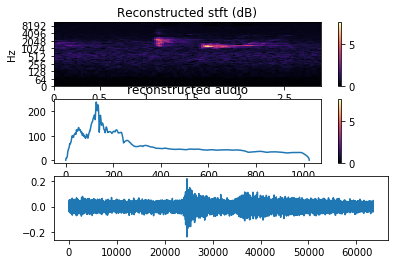

In [38]:
def Reconstruct(M, sr):
    #reconstruct the stft from the mel-spectrogram
    Sr = librosa.feature.inverse.mel_to_stft(M, sr)
    #reconstruct the original signal
    yr = librosa.griffinlim(Sr) #griffin transformation
    #yr = librosa.istft(Sr, hop_length=512)
    plt.figure()
    plt.subplot(3,1,1)
    librosa.display.specshow(Sr, x_axis='time', y_axis='log')
    plt.title('Reconstructed stft (dB)')
    plt.colorbar()
    #librosa.display.specshow(log_M, x_axis='time', y_axis='log')
    plt.subplot(3,1,2)
    #plt.plot( yr )
    plt.plot( Sr.sum(1) )
    plt.title('reconstructed audio')
    plt.colorbar()
    
    yr.shape, type( yr )
    plt.subplot(3,1,3)
    plt.plot(yr)
    plt.show()
    return yr
    
yr = Reconstruct(M, sr)

In [39]:
def MelFilterCompare( M, pcen_M ):
    pcen_max = librosa.pcen(M * (2**31), max_size=3)
    plt.figure()
    plt.subplot(2,1,1)
    librosa.display.specshow(pcen_M, x_axis='time', y_axis='mel')
    plt.title('Per-channel energy normalization (no max-filter)')
    plt.colorbar()
    plt.subplot(2,1,2)
    librosa.display.specshow(pcen_max, x_axis='time', y_axis='mel')
    plt.title('Per-channel energy normalization (max_size=3)')
    plt.colorbar()
    plt.tight_layout()
    plt.show()

define a low frequency filter (high-pass)
- can also be used as a band-pass filter if a lowerfreq is also supplied as an argument

In [40]:

def ApplyFilter( Din, sr, upperfreq = 1020, lowerfreq=None ):
    '''high pass filter
    ci = 250 #~5000, ci = 125 #~2691, ci = 50 #~1000, ci = 40'''
    frequency_conversion = librosa.core.fft_frequencies(sr=sr)
    upper_index = np.abs(frequency_conversion - upperfreq).argmin()
    #print(f'upper frequency index, {upper_index} closest freq {frequency_conversion[upper_index]}')
    if lowerfreq is not None:
        lower_index = np.abs(frequency_conversion - lowerfreq).argmin()
        #print(f'lower frequency index, {lower_index} closest freq {frequency_conversion[lower_index]}')
    else:
        lower_index = 0
    Din[lower_index:upper_index,:] = np.zeros( (upper_index-lower_index, Din.shape[1]) )
    

In [41]:
import os
os.getcwd()

#find the peak, cut two seconds and store in a new array temporarily...
#or if longer recording,take all of the peak samples, or the biggest 2, or 3, and get the most likely for all
#draw colored boxes around sample sections in the app interface

'/home/chris/Documents/Insight2020/examples'

filter frequency 1020
sr 44100
209.02017211914062 occurances, of index 128


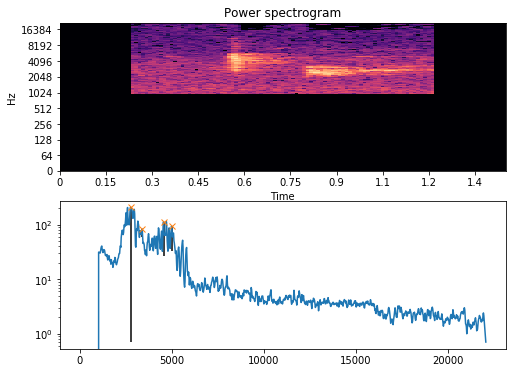

filter frequency 1020
sr 44100
557.5006103515625 occurances, of index 128


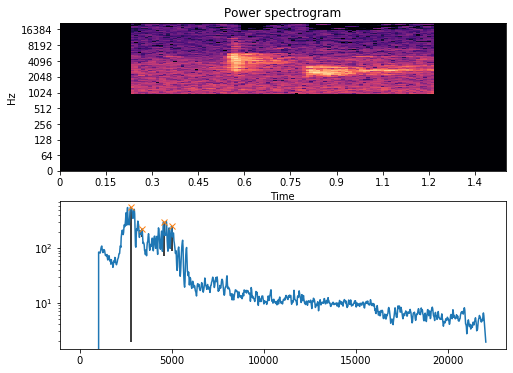

128

In [42]:
    
#function to get frequency bin with most entries (i.e. the Prominent Frequency)
def GetPromFreqIndex(y, sr, filt_Hz, output=False):
    
    #hop_length = 512
    D = np.abs(librosa.stft(y))
    #print('shape', D.shape)
    nc = 20
    D[:,:nc], D[:,-nc:] = 0, 0
    ####following lines are for testing
    
    if filt_Hz is not None:
        ApplyFilter(D, sr, filt_Hz)
    
    ####end testing lines, remove once completed, make a more succinct function
    freq_sum =  D.sum(1)
    
    #get the most prominent frequency index
    prom_freq = freq_sum.tolist().index(max(freq_sum))
    
    if output:
        print('filter frequency', filt_Hz)
        print('sr', sr)
        #times = librosa.times_like(D)
        plt.figure( figsize=(8,6))
        ax1 = plt.subplot(2, 1, 1)
        dbs = librosa.amplitude_to_db(D, ref=np.max)
        librosa.display.specshow(dbs, sr=sr, y_axis='log', x_axis='time')
        plt.title('Power spectrogram')
        #ax1.set_ylim()
        ax2 = plt.subplot(2, 1, 2)

        frequencies = librosa.core.fft_frequencies(sr=sr)
        plt.plot( frequencies , freq_sum )
    
    
        #plt.xscale('log') #use yaxis since we are summing the rows (frequencies)
        plt.yscale('log')
    
    
        print(f'{max(freq_sum)} occurances, of index {prom_freq}' )
        #plot the prominences from the scipy example
        x = freq_sum
        
        try:
            #print('xshape', x.shape)
            peaks, _ = find_peaks(x, height=0.4*max(x), prominence=5, distance=20)
            #print('peak list', peaks)
            prominences = peak_prominences(x, peaks)[0]
            contour_heights = x[peaks] - prominences
            plt.plot(frequencies[peaks], x[peaks], "x")
            plt.vlines(x=frequencies[peaks], ymin=contour_heights, ymax=x[peaks])
        except Exception as e:
            print(e)
        
        plt.savefig('bad_plot.png')
        plt.show()
        #end peak finding
        #...just use max for now
    
        if prom_freq in peaks:
            peaks = list(peaks)
            
            peaks.remove( prom_freq )
            #print('removing largest peak from secon peaks list...')

    return prom_freq#, peaks[0]    
    
def GetFreqRange( index, sample_rate ):
    #index = GetPromFreqIndex(y, sample_rate, FILTER=librosa.iirt)
    return librosa.core.fft_frequencies(sr=sample_rate)[index:index+2]

D = np.abs(librosa.stft(wf_np))
ApplyFilter( D, sr=sr, upperfreq=1200, lowerfreq=500)
#GetPromFreqIndex(wf_np, sr, output=True)
#GetPromFreqIndex(wf_np, sr, filt_Hz=400, output=True)
GetPromFreqIndex(wf_np, sr, filt_Hz=1020, output=True)
#pfi = GetPromFreqIndex(wf_np, sr, filt_Hz=2200, output=True)
GetPromFreqIndex(y, sr, filt_Hz=1020, output=True)
#GetFreqRange( pfi, sr )

In [43]:
   
def GetPromMelFreqIndex(y, sr, filt_Hz=600, output=False):
    
    #hop_length = 512
    D = np.abs(librosa.feature.melspectrogram(y, sr=sr))
    ApplyFilter(D, sr, upperfreq=filt_Hz )
    times = librosa.times_like(D)
    freq_sum =  D.sum(1)
    if output:
        print('sr', sr)
        plt.figure( figsize=(8,6) )
        ax1 = plt.subplot(2, 1, 1)
        dbs = librosa.amplitude_to_db(D, ref=np.max)
        librosa.display.specshow(dbs, sr=sr, y_axis='mel', x_axis='time')
        plt.title('Mel power spectrogram')
        #ax1.set_ylim()
        ax2 = plt.subplot(2, 1, 2)
        
        plt.plot( freq_sum ) #no x-axis conversion to frequency
        plt.yscale('log')
        #plot the prominences from the scipy example
        x = freq_sum
        peaks, _ = find_peaks(x, height=0.25*max(x), prominence=5, distance=5)
        prominences = peak_prominences(x, peaks)[0]
        contour_heights = x[peaks] - prominences
        plt.plot(peaks, x[peaks], "x")
        plt.vlines(x=peaks, ymin=contour_heights, ymax=x[peaks])
        #end peak finding
        #...just use max for now
        
        plt.show()
    prom_freq = freq_sum.tolist().index(max(freq_sum))
    #print(f'{max(freq_sum)} occurances, of index {prom_freq}' )
    
    return prom_freq

def ConstatQPower(y, sr, ymin='C3', filt_Hz=300, output=False):

    #hop_length = 512
    #D = librosa.cqt(y)
    D = np.abs(librosa.cqt(y, sr, fmin=librosa.note_to_hz(ymin) ) )
    ApplyFilter(D, sr, upperfreq=filt_Hz )
    times = librosa.times_like(D)
    freq_sum = D.sum(1)
    if output:
        print('sr', sr)
        plt.figure( figsize=(8,6) )
        ax1 = plt.subplot(2, 1, 1)
        dbs = librosa.amplitude_to_db(D, ref=np.max)
        librosa.display.specshow(dbs, sr=sr, y_axis='cqt_note', x_axis='time')

        plt.colorbar(format='%+2.0f dB')
        plt.title('Constant Q SPower spectrum')
        #ax1.set_ylim()
        ax2 = plt.subplot(2, 1, 2)
        x = freq_sum
        peaks, _ = find_peaks(x, height=0.25*max(x))#
        , prominence=1, distance=2)
        print('Q peaks', peaks)
        prominences = peak_prominences(x, peaks)[0]
        contour_heights = x[peaks] - prominences
        plt.plot(peaks, x[peaks], "x")
        plt.vlines(x=peaks, ymin=contour_heights, ymax=x[peaks])
        plt.plot( freq_sum )
        plt.yscale('log')
        plt.show()
        ##try inverse Q power transform
        
    prom_freq = freq_sum.tolist().index(max(freq_sum))
    #print(f'{max(freq_sum)} occurances, of index {prom_freq}' )
    return prom_freq


power spectrogram
filter frequency 1020
sr 44100
209.02017211914062 occurances, of index 128


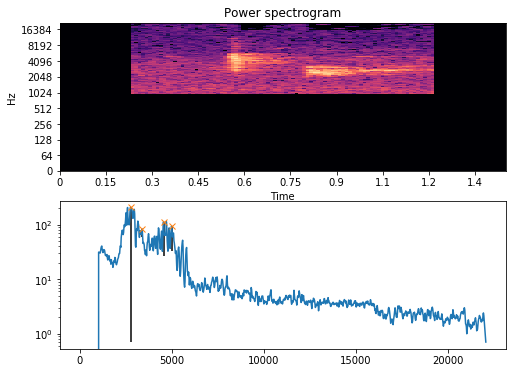

most prominent freq-rage [2756.25       2777.78320312]

constant q-value spectrogram
sr 44100
Q peaks [38 53 60]


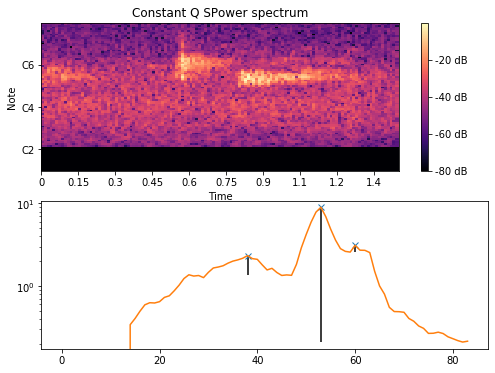


mel frequency spectrogram
sr 44100


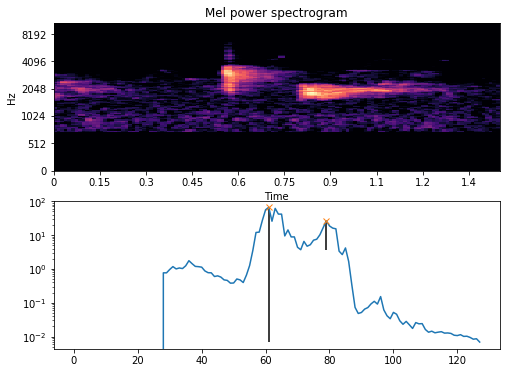

mel freq is [1853.16744504 1903.92117631]


In [44]:
print('power spectrogram')
###prom_freq_index, second_peak = GetPromFreqIndex(y=wf_np, sr=sr) #add on next pass
prom_freq_index = GetPromFreqIndex(y=wf_np, sr=sr, filt_Hz=1020, output=True)
freq_range = GetFreqRange( index=prom_freq_index, sample_rate=sr) 
###freq_range2 = GetFreqRange( index=second_peak, sample_rate=sr) 
##print('index', prom_freq_index,'peaks', second_peak)
print('most prominent freq-rage', freq_range) 
##print('most prominent freq-rage', freq_range2)
    
print('\nconstant q-value spectrogram')
prom_freq_index = ConstatQPower(y=wf_np, sr=sr, output=True)

print('\nmel frequency spectrogram')
#prom_freq_index = GetPromFreqIndex(y=wf_np, sr=sr, FILTER=librosa.feature.melspectrogram, yaxis='linear')
prom_freq_index = GetPromMelFreqIndex(y=wf_np, sr=sr, output=True)
mel_freq = librosa.core.mel_frequencies()[prom_freq_index:prom_freq_index+2]
print('mel freq is', mel_freq)

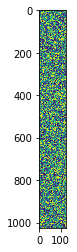

In [45]:
#look at the phase anglelll
A = np.angle( librosa.stft(wf_np))
plt.imshow( A )
plt.show();
A.shape, D.shape
plt.show()
#plt.plot( A.sum(1), D.sum(1), 'x' )

The following two cells detemine the 'loudest' moment of the audio.  
Then the fourier transform is computed for the 'hop_length'=2048 before and after that moment
The peak frequency in those single hop fourier transforms are useable features
...turn into a fucntion eventually...just the `D.sum(0)` and `max` of `amp_sum`

49


(1.1377777777777778, 25088, 2.8792743764172335, 63488)

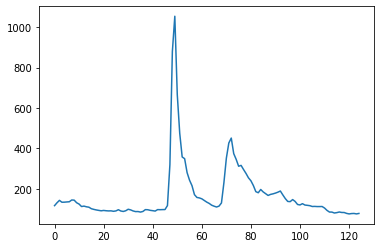

In [46]:
#single 'loudest' moment (what is the fft there? and mel...)
D = np.abs(librosa.stft(wf_np))

amp_sum =  D.sum(0)
plt.plot( amp_sum )
prom_amp = amp_sum.tolist().index(max(amp_sum))
print(prom_amp)
times = librosa.times_like(D)
samples = librosa.samples_like(D)
times[ prom_amp ], samples[prom_amp], times[-1], samples[-1]

(array([2971.58203125, 2993.11523438]), array([4521.97265625, 4543.50585938]))

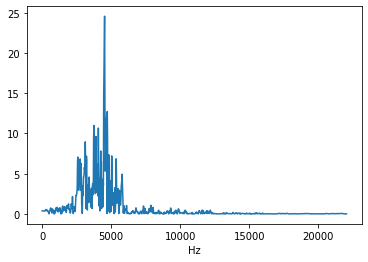

In [47]:
#look at the single spectrum around this sample number
n_fft = 2048
#hop_length = n_fft+1
f, ax = plt.subplots()
ft = np.abs(librosa.stft(wf_np[samples[prom_amp]:samples[prom_amp]+n_fft], n_fft=n_fft,
                        hop_length=n_fft+1))
ax.plot( librosa.core.fft_frequencies(sr=sr), ft );
prom_freq = ft.tolist().index(max(ft))
slice_after = GetFreqRange( prom_freq, sample_rate=sr )

#look at the single spectrum around this sample number
n_fft = 2048
#hop_length = n_fft+1
ft = np.abs(librosa.stft(wf_np[samples[prom_amp]-+n_fft:samples[prom_amp]], n_fft=n_fft,
                        hop_length=n_fft+1))

#ax.plot(ft);
#ax.set_yscale('log')
#ax.set_xscale('log')
ax.set_xlabel('Hz')
#ax.set_ylabel()
prom_freq = ft.tolist().index(max(ft))
slice_before = GetFreqRange( prom_freq, sample_rate=sr )

slice_before, slice_after

[array([3962.109375  , 3983.64257812]),
 array([1227.39257812, 1248.92578125]),
 array([2971.58203125, 2993.11523438]),
 array([4521.97265625, 4543.50585938]),
 array([4285.10742188, 4306.640625  ]),
 array([4543.50585938, 4565.0390625 ])]

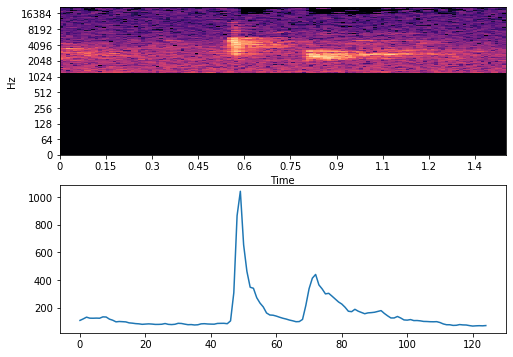

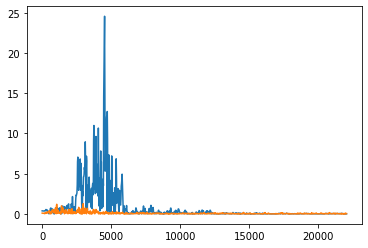

In [68]:
def GetSingleSegmentFreq( wf_np, sr, prom_amp, n_slices, filt_Hz, samples, output=False ):
    n_fft = 2048
    #get freq i slices before peak
    if output:
        ft = np.abs(librosa.stft(wf_np[samples[prom_amp]:samples[prom_amp]+n_fft], n_fft=n_fft,
                                hop_length=n_fft+1))

        #ax.plot( librosa.core.fft_frequencies(sr=sr), ft );
        prom_freq = ft.tolist().index(max(ft))
        slice_after = GetFreqRange( prom_freq, sample_rate=sr )
        #get freq after peak (i slaces before)
        #f,ax = plt.subplots()
    
        f = plt.figure()
        ax = plt.subplot(1, 1, 1)
        ax.plot( librosa.core.fft_frequencies(sr=sr), ft );
        ft = np.abs(librosa.stft(wf_np[samples[prom_amp]-n_fft:samples[prom_amp]], n_fft=n_fft,
                        hop_length=n_fft+1))

        prom_freq = ft.tolist().index(max(ft))
        slice_before = GetFreqRange( prom_freq, sample_rate=sr )

        #ax = plt.subplot(2, 1, 2)
        ax.plot( librosa.core.fft_frequencies(sr=sr), ft );
        #generalize

        plt.figure( figsize=(8,12) )
    gen_slices = []
    oset = 0
    for i in range(-n_slices-oset, n_slices-oset):
        si, ei = samples[prom_amp]+i*n_fft, samples[prom_amp]+(i+1)*n_fft #start index, end index
        #print(f'indecies used: si {si}, ei {ei}')
        ft = np.abs( librosa.stft(wf_np[si: ei], n_fft=n_fft,
                                 # hop_length=n_fft+1, pad_mode='constant') )
                                hop_length=n_fft+1) )
        #print( 'shape', ft.shape )
        ApplyFilter( ft, sr, upperfreq=filt_Hz, lowerfreq=None )
        
        prom_freq = ft.tolist().index(max(ft))
        #print(f'prom freq index {prom_freq}')
        gen_freq = GetFreqRange( prom_freq, sample_rate=sr )
        gen_slices.append(gen_freq)
        if output:
            ax = plt.subplot(n_slices*2, 1, i+n_slices+1+oset)
            ax.plot( librosa.core.fft_frequencies(sr=sr), ft ) #plot 1D spectra of freqency vs occurance
            #librosa.display.specshow(ft, sr=sr, y_axis='log', x_axis='time')
    ax.set_xlabel('Hz')
    plt.suptitle('fourier spectrum around peak volume')#, y=0.94)
    plt.tight_layout()
    return gen_slices
    #return slice_before, slice_after, gen_slices #for testing consistency

def GetSlicesAroundPeakVolume( wf_np, sr, n_slices, filt_Hz=1020, output=False ):
    '''get the prominent frequencies of single stft slices
    choose the number before and after'''
    #take the stft of entire spectrum
    D = np.abs(librosa.stft(wf_np))
    samples = librosa.samples_like(D)
    ApplyFilter( D, sr, upperfreq = filt_Hz )
    amp_sum =  D.sum(0) #sum along the "time" axis, to get the peaks in volume
    if output:
        plt.figure( figsize=(8,6) )
        ax = plt.subplot(2, 1, 1)
        #librosa.display.specshow(D, sr=sr, y_axis='log', x_axis='time')
        dbs = librosa.amplitude_to_db(D, ref=np.max)
        librosa.display.specshow(dbs, sr=sr, y_axis='log', x_axis='time')
        #get the loudest location's index
        ax = plt.subplot(2, 1, 2)
    
        plt.plot( amp_sum )
    
    
    prom_amp = amp_sum.tolist().index(max(amp_sum))
    return GetSingleSegmentFreq( wf_np, sr, prom_amp, n_slices, filt_Hz=filt_Hz, samples=samples, output=output )
    
GetSlicesAroundPeakVolume(wf_np, sr, n_slices=3, filt_Hz=1200, output=True)
#later get spacing between two largest peaks

In [49]:
for i in range(-4,4+1):
    print(i)

-4
-3
-2
-1
0
1
2
3
4


Fourier Transform on the entire spectrum using scipy

max (0.0010151847964152694-0.00024859330733306706j), position: 4099 
0.0011862025
(0.0010151848-0.0002485933j) 0.0011862025


3743

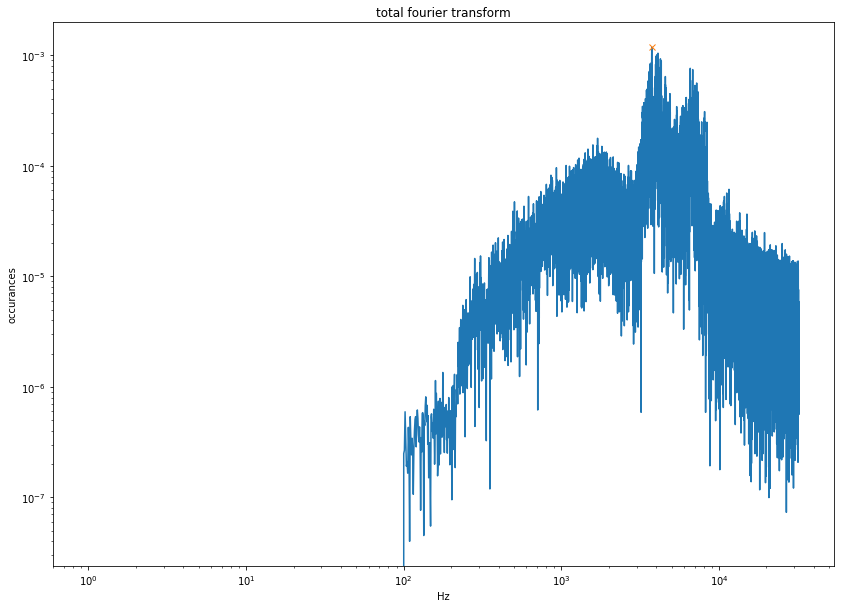

In [51]:
def TotalFourierPeak( y, filt_Hz=100, output=False ):
    fourier = scipy.fft( y )
    N = len(wf_np)
    y2 = fourier[:int(N/2)]/N
    y2_abs = np.abs(y2)
    y2_abs[:filt_Hz] = 0
    
    #ApplyFilter([y2_abs], sr, upperfreq=200)
    y2max, y2max_abs = max(y2), max(y2_abs)
    i_y2max, i_y2max_abs = y2.tolist().index(max(y2)), y2_abs.tolist().index(max(y2_abs))
    
    if output:
        print(f'max {max(y2)}, position: {y2.tolist().index(max(y2))} ' )
        print( y2max_abs)
        f,ax = plt.subplots( figsize=(14,10) )
        #ax.plot( y2 )
        
        ax.plot( y2_abs )
        ax.plot( i_y2max_abs,  y2max_abs, 'x')
        ax.set_xscale('log')
        ax.set_yscale('log')
        ax.set_xlabel('Hz')
        ax.set_ylabel('occurances')
        ax.set_title('total fourier transform')
        #ax.vlines( i_y2max_abs, 0,  y2max_abs  )
        print( y2max, y2max_abs )
    return i_y2max_abs


f_peak = TotalFourierPeak( wf_np, output=True )
f_peak


In [52]:
a = ([0],
    [2])
x = np.array( a )
y = np.array( (0,1,2) )
y = x
try:
    pritn(y.shape[1])
    print(y.max())
    
except:
    print(y.shape[0])
    print(y.max())

2
2


max ss(0.0020303695928305387-0.0004971866146661341j), position: 4098 


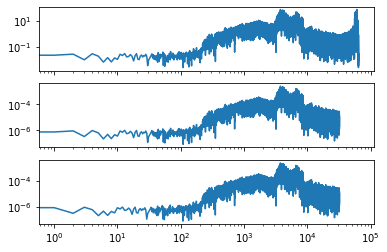

In [53]:
#plt.plot( np.abs(fourier) );
fourier = scipy.fft( wf_np )
N = len(wf_np)

y2 = fourier[:int(N/2)]/N
ySS = y2[1:] = 2*y2[1:]
#y2 = fourier
f,ax = plt.subplots(3,1, sharex=True)
ax[0].plot( np.abs( fourier ));
ax[1].plot( np.abs( y2 ));
ax[2].plot( np.abs( ySS ))

for i in range(3):
    ax[i].set_yscale('log')
    ax[i].set_xscale('log')
    
print(f'max ss{max(ySS)}, position: {ySS.tolist().index(max(ySS))} ' )
#print(f'max {max(y2)}, position: {y2.tolist().index(max(y2))} ' )


In [54]:
##libs needed:
#torchaudio
#librosa

##fucntions needed:
#GetPromFreqIndex
#GetFreqRange
#ConstantQPower
#GetPromMelFreqIndex
#librosa.core.mel_frequencies
#TotalFourierPeak
#GetSlicesAroundPeakVolume
def GetParamsForFile( file, path, flt=False ):
    '''get the params to feed into:
        - the .csv f.write() funciton 
        - the model as a row for the predict" method '''
    filename = os.path.join( path, file )
    wf, sr = torchaudio.load( filename )
    wf_np = np.asfortranarray( wf[0].numpy() )
    #get the prominent freq range from stft
    prom_freq_index = GetPromFreqIndex(y=wf_np, sr=sr, filt_Hz=1020)
    prom_freq_range = GetFreqRange( index=prom_freq_index, sample_rate=sr) 
    #get constant Q freq
    prom_Q_freq = ConstatQPower(y=wf_np, sr=sr)
    #get mel freq maximum
    prom_freq_index = GetPromMelFreqIndex(y=wf_np, sr=sr)
    mel_freq = librosa.core.mel_frequencies()[prom_freq_index:prom_freq_index+2]
    #get the most prominent frequency from the total fourier transform
    fourier_freq = TotalFourierPeak( wf_np )
    #get the frequencies from the slices around the peak volume
    slice_freqs = GetSlicesAroundPeakVolume(wf_np, sr, n_slices=3, filt_Hz=1200)
    
    #get the species name from the filename string, this is the target value
    species_name = file.split('_')
    species_name = species_name[0]
    
    param_list = [ prom_freq_range[0], prom_Q_freq, mel_freq[0], fourier_freq ] +\
        [sf[0] for sf in slice_freqs] + [wf_np.shape[0], sr, species_name ]
    #string_to_write = f'{prom_freq_range[0]}, {prom_Q_freq}, {mel_freq[0]}, {slice_before[0]}, {slice_after[0]},\
                    #{times[prom_amp]}, {samples[prom_amp]}, {samples[-1]}, {sr}, {species_name} \n' 
    
    return param_list            
    
    
    #get equivilent times and sample arrays

    '''
    #combine the answers to create the string we will be writing
    string_to_write = f'{prom_freq_range[0]}, {prom_Q_freq}, {mel_freq[0]}, {slice_before[0]}, {slice_after[0]},\
    {times[prom_amp]}, {samples[prom_amp]}, {samples[-1]}, {sr},{species_name}\n' 
    #f.write( string_to_write )
    ret = string_to_write.strip().split(',')
    #print(ret, len(ret)) #uncomment for testing
    to_rem = -1*( len( ret ) - 9  )
    #print(to_rem) #uncomment for testing
    ret = ret[:to_rem]
    ret = [float(r) for r in ret]
    
    return ret
'''
pars = GetParamsForFile( file, path )
pars, len(pars)

ValueError: can't extend empty axis 0 using modes other than 'constant' or 'empty'

In [67]:
#function to write a CSV file to feed into pandas, then the ML model
def WriteCSV( files, path ):
    with open('bird_train.csv', 'w+') as f:
        #write headers line
        headers_string = 'peak_Hz,peak_Q,peak_mel,fourier_freq,\
        ampmax_n3,ampmax_n2,ampmax_n1,ampmax_0,ampmax_p1,ampmax_p2,\
        num_samples,sample_rate,species\n' #for n_points = 5
        #print('headers len', len(headers_string.split(',')))
        f.write( headers_string )
        exception_list = []
        for i,file in enumerate(files):
            try:
                param_list = GetParamsForFile( file, path )

                string_to_write = ','.join( [str(pl) for pl in param_list]  )

                f.write( string_to_write )
                f.write('\n')

            except Exception as e:
                exception_list.append( e )
                #raise e
                print(i)
                print('failed to process', file, 'due to exception', e)
            
            #if i==1: break
        f.close()  
    return exception_list
            

In [68]:
##uncomment this to loop through all files, and write your .CSV file to feed the model
path =  os.path.join( cwd, 'cutclips' )
files = [f for f in os.listdir( path )]
WriteCSV( files, path )
#files

19
failed to process American Robin_5_7.wav due to exception can't extend empty axis 0 using modes other than 'constant' or 'empty'
37
failed to process American Crow_19_24.wav due to exception can't extend empty axis 0 using modes other than 'constant' or 'empty'
47
failed to process Blue Jay_130_1.wav due to exception can't extend empty axis 0 using modes other than 'constant' or 'empty'
48
failed to process Bald Eagle_11_7.wav due to exception index 127 is out of bounds for axis 0 with size 125
67
failed to process Canada Goose_35_8.wav due to exception can't extend empty axis 0 using modes other than 'constant' or 'empty'
73
failed to process Carolina Chickadee_5_7.wav due to exception can't extend empty axis 0 using modes other than 'constant' or 'empty'
82
failed to process Eastern Bluebird_24_6.wav due to exception can't extend empty axis 0 using modes other than 'constant' or 'empty'
85
failed to process American Crow_12_3.wav due to exception can't extend empty axis 0 using mo

699
failed to process American Crow_40_1.wav due to exception can't extend empty axis 0 using modes other than 'constant' or 'empty'
702
failed to process American Crow_54_15.wav due to exception can't extend empty axis 0 using modes other than 'constant' or 'empty'
727
failed to process Canada Goose_2_4.wav due to exception can't extend empty axis 0 using modes other than 'constant' or 'empty'
730
failed to process Blue Jay_1_1.wav due to exception Filter pass-band lies beyond Nyquist
742
failed to process American Goldfinch_21_5.wav due to exception can't extend empty axis 0 using modes other than 'constant' or 'empty'
755
failed to process Blue Jay_52_1.wav due to exception can't extend empty axis 0 using modes other than 'constant' or 'empty'
761
failed to process Blue Jay_47_10.wav due to exception can't extend empty axis 0 using modes other than 'constant' or 'empty'
779
failed to process American Robin_73_12.wav due to exception can't extend empty axis 0 using modes other than '

1318
failed to process Blue Jay_54_23.wav due to exception can't extend empty axis 0 using modes other than 'constant' or 'empty'
1359
failed to process Carolina Chickadee_30_1.wav due to exception can't extend empty axis 0 using modes other than 'constant' or 'empty'
1364
failed to process American Robin_16_10.wav due to exception can't extend empty axis 0 using modes other than 'constant' or 'empty'
1365
failed to process Canada Goose_0_8.wav due to exception can't extend empty axis 0 using modes other than 'constant' or 'empty'
1379
failed to process American Robin_26_12.wav due to exception can't extend empty axis 0 using modes other than 'constant' or 'empty'
1381
failed to process Brown-headed Cowbird_22_3.wav due to exception index 129 is out of bounds for axis 0 with size 125
1383
failed to process Brown-headed Cowbird_31_0.wav due to exception can't extend empty axis 0 using modes other than 'constant' or 'empty'
1390
failed to process American Crow_41_0.wav due to exception F

1952
failed to process American Crow_41_2.wav due to exception Filter pass-band lies beyond Nyquist
1980
failed to process Blue Jay_49_9.wav due to exception can't extend empty axis 0 using modes other than 'constant' or 'empty'
1997
failed to process Blue Jay_120_14.wav due to exception index 126 is out of bounds for axis 0 with size 125
2005
failed to process Blue Jay_28_9.wav due to exception index 126 is out of bounds for axis 0 with size 125
2008
failed to process Carolina Chickadee_10_1.wav due to exception can't extend empty axis 0 using modes other than 'constant' or 'empty'
2018
failed to process American Crow_54_34.wav due to exception can't extend empty axis 0 using modes other than 'constant' or 'empty'
2030
failed to process Brown-headed Cowbird_3_3.wav due to exception can't extend empty axis 0 using modes other than 'constant' or 'empty'
2034
failed to process Eastern Bluebird_0_5.wav due to exception can't extend empty axis 0 using modes other than 'constant' or 'empty'

2602
failed to process Brown-headed Cowbird_10_6.wav due to exception index 131 is out of bounds for axis 0 with size 125
2615
failed to process Carolina Chickadee_43_16.wav due to exception index 135 is out of bounds for axis 0 with size 125
2624
failed to process Carolina Chickadee_43_26.wav due to exception can't extend empty axis 0 using modes other than 'constant' or 'empty'
2643
failed to process Carolina Chickadee_58_1.wav due to exception can't extend empty axis 0 using modes other than 'constant' or 'empty'
2644
failed to process Canada Goose_20_3.wav due to exception can't extend empty axis 0 using modes other than 'constant' or 'empty'
2695
failed to process Carolina Chickadee_74_1.wav due to exception can't extend empty axis 0 using modes other than 'constant' or 'empty'
2700
failed to process Blue Jay_54_9.wav due to exception can't extend empty axis 0 using modes other than 'constant' or 'empty'
2722
failed to process American Goldfinch_33_0.wav due to exception index 135

3288
failed to process Brown-headed Cowbird_10_1.wav due to exception index 127 is out of bounds for axis 0 with size 125
3316
failed to process Canada Goose_32_1.wav due to exception can't extend empty axis 0 using modes other than 'constant' or 'empty'
3324
failed to process Blue Jay_51_1.wav due to exception can't extend empty axis 0 using modes other than 'constant' or 'empty'
3333
failed to process American Goldfinch_62_28.wav due to exception can't extend empty axis 0 using modes other than 'constant' or 'empty'
3336
failed to process Blue Jay_117_9.wav due to exception index 131 is out of bounds for axis 0 with size 125
3339
failed to process Carolina Chickadee_43_7.wav due to exception index 135 is out of bounds for axis 0 with size 125
3356
failed to process Canada Goose_20_4.wav due to exception index 126 is out of bounds for axis 0 with size 125
3357
failed to process Blue Jay_52_5.wav due to exception can't extend empty axis 0 using modes other than 'constant' or 'empty'
33

3786
failed to process Blue Jay_1_0.wav due to exception Filter pass-band lies beyond Nyquist
3787
failed to process American Crow_18_1.wav due to exception can't extend empty axis 0 using modes other than 'constant' or 'empty'
3816
failed to process American Robin_93_7.wav due to exception can't extend empty axis 0 using modes other than 'constant' or 'empty'
3827
failed to process Canada Goose_35_5.wav due to exception can't extend empty axis 0 using modes other than 'constant' or 'empty'
3828
failed to process Eastern Bluebird_39_1.wav due to exception can't extend empty axis 0 using modes other than 'constant' or 'empty'
3857
failed to process American Robin_20_3.wav due to exception can't extend empty axis 0 using modes other than 'constant' or 'empty'
3870
failed to process American Goldfinch_32_14.wav due to exception can't extend empty axis 0 using modes other than 'constant' or 'empty'
3882
failed to process Canada Goose_28_9.wav due to exception index 131 is out of bounds for

4451
failed to process American Robin_9_19.wav due to exception can't extend empty axis 0 using modes other than 'constant' or 'empty'
4458
failed to process Eastern Bluebird_21_0.wav due to exception can't extend empty axis 0 using modes other than 'constant' or 'empty'
4468
failed to process Blue Jay_54_27.wav due to exception can't extend empty axis 0 using modes other than 'constant' or 'empty'
4473
failed to process Carolina Chickadee_43_15.wav due to exception can't extend empty axis 0 using modes other than 'constant' or 'empty'
4475
failed to process American Robin_42_6.wav due to exception can't extend empty axis 0 using modes other than 'constant' or 'empty'
4477
failed to process American Crow_64_0.wav due to exception can't extend empty axis 0 using modes other than 'constant' or 'empty'
4484
failed to process Carolina Chickadee_14_0.wav due to exception index 126 is out of bounds for axis 0 with size 125
4485
failed to process Blue Jay_46_3.wav due to exception Filter pass

In [69]:
len(exception_list)/len(files)

NameError: name 'exception_list' is not defined

In [ ]:
#gradient boosting#
#try XGDboost

In [ ]:
#loop over the files in the folder, and create a csv to use for training

def WriteCSV_old( files, path ):
    with open('bird_train.csv', 'w+') as f:
        #write headers line
        f.write( 'peak_Hz, peak_Q, peak_mel, peak_before_ampmax, peak_after_ampmax,\
        ampmax_time, ampmax_sample, num_samples, sample_rate, species \n' )
        for file in files:
            try:
                filename = os.path.join( path, file )
                wf, sr = torchaudio.load( filename )
                wf_np = np.asfortranarray( wf[0].numpy() )
                #get the prominent freq range from stft
                prom_freq_index = GetPromFreqIndex(y=wf_np, sr=sr)
                prom_freq_range = GetFreqRange( index=prom_freq_index, sample_rate=sr) 
                #get constant Q freq
                prom_Q_freq = ConstatQPower(y=wf_np, sr=sr)
                #get mel freq maximum
                prom_freq_index = GetPromMelFreq(y=wf_np, sr=sr)
                mel_freq = librosa.core.mel_frequencies()[prom_freq_index:prom_freq_index+2]
                #find the time bin which has the greatest amplitude
                D = np.abs(librosa.stft(wf_np))
                amp_sum = D.sum(0)
                prom_amp = amp_sum.tolist().index(max(amp_sum))
                times = librosa.times_like(D)
                samples = librosa.samples_like(D)
                #get peak before and after
                n_fft = 2048

                ft = np.abs(librosa.stft(wf_np[samples[prom_amp]:samples[prom_amp]+n_fft], n_fft=n_fft,
                        hop_length=n_fft+1))

                prom_freq = ft.tolist().index(max(ft))
                slice_after =GetFreqRange( prom_freq, sample_rate=sr )
                ft = np.abs(librosa.stft(wf_np[samples[prom_amp]-n_fft:samples[prom_amp]], n_fft=n_fft,
                        hop_length=n_fft+1))
                prom_freq = ft.tolist().index(max(ft))
                slice_before = GetFreqRange( prom_freq, sample_rate=sr )
                species_name = file.split('_')
                species_name = species_name[0]
                #get equivilent times and sample arrays

                #combine the answers to create the string we will be writing
                string_to_write = f'{prom_freq_range[0]}, {prom_Q_freq}, {mel_freq[0]}, {slice_before[0]}, {slice_after[0]},\
                {times[prom_amp]}, {samples[prom_amp]}, {samples[-1]}, {sr}, {species_name} \n' 
                f.write( string_to_write )
                #f.write( 'peak_Hz peak_Q peak_mel before_ampmax after_ampmax ampmax_time amp_max_sample sample_rate species' ) )
                #f.write( 'peak_Hz peak_Q peak_mel peak_before_ampmax peak_after_ampmax sample_rate species'.split() ) )

            except Exception as e:
                print('failed to process', filename, 'due to exception', e)
            #break
        f.close()
            

In [ ]:
#read in the csv to pandas
import pandas as pd
filename = 'bird_train.csv'
data = pd.read_csv(filename)
data.head()

In [ ]:
#most prominent frequencies seem to be below 100 Hz, check what note this corresponds to
#around this value will likely be a good value to applymy filter to
#maybe a simple solution is to just set all values below a certain frequency to 0
for n in data.peak_Hz.value_counts().items():
    print(n)

In [ ]:
#data.tail(10)
#data.isnull().sum()
for item in data:
    print(f'item {item}: data {data[item].nunique()}' )

In [ ]:
#data['species'].value_counts()
data.species.value_counts()

In [ ]:
import matplotlib.pyplot as plt
#plot the prominent frequency for each species
#spec = data.groupby('species')
key0 = 'species'
key1 = 'sample_rate'
xkey = 'peak_Hz'
ykey =  'peak_Q'
#xykey = 'peak_before_ampmax'
#ykey = ' peak_after_ampmax'

f,axs = plt.subplots(2, 1)
for conv, frame in data.groupby(key0):
    
    for source, frame2 in frame.groupby(key1):
        print('conv', conv, 'source', source)
        
        if source == 44100:
            ax = axs[0]
        elif source == 48000:
            ax = axs[1]
        #elif source == 'seo':
        #    ax = ax3
        else:
            raise ValueError('problem with source check in PlotInside!')

        ax.scatter(frame2[xkey], frame2[ykey],
            edgecolors='none', 
            label='{} {}, {} {}'.format(key0, conv, key1, source), #add label with conversion
            alpha = 0.4 )
#ax.legend()
ax.set_xlabel( xkey )
ax.set_ylabel( ykey )
plt.show();

In [ ]:
#use OneHot encoding to transform categorical data into something useful
from sklearn.preprocessing import OneHotEncoder
#simple imputer will handle missing values
from sklearn.impute import SimpleImputer
#chain together multiple transformations in one custom filter
from sklearn.pipeline import Pipeline
#select (by column header/key) which columns get which kind of transformation
from sklearn.compose import ColumnTransformer

In [ ]:
#choose which columns get transformed
cat_cols = ['species']
#create the pipeline
cat_si_step = ('si', SimpleImputer(strategy='constant',
                   fill_value='MISSING'))
cat_ohe_step = ('ohe', OneHotEncoder(sparse=False,
                    handle_unknown='ignore'))

#combine the two transformations into a single Pipeline
cat_steps = [cat_si_step, cat_ohe_step]
cat_pipe = Pipeline(cat_steps)

cat_transformers = [('cat', cat_pipe, cat_cols)]
ct = ColumnTransformer(transformers=cat_transformers)

#train = train[['species']].copy()
#output_data = temp.reshape(-1, 1)
#output_data = one_hot_encoder.fit_transform(output_data).toarray()
#target_fit_transformed = ct.fit_transform(data)
target_transformed = ct.transform(data)
pd.DataFrame( target_transformed ).tail(6)

In [ ]:
def ExtractOneHot( string_in ):
    pass

all_steps = ct.named_transformers_['cat']
ohe = all_steps.named_steps['ohe']
cat_feature_names = ohe.get_feature_names()
ohe_column_names = [cfn.strip('x0_').strip() for cfn in cat_feature_names]
cat_feature_names, ohe_column_names 

In [ ]:
#from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
#from sklearn.multioutput import MultiOutputRegressor

fraction = 0.75  # 25% of the available data will be used as the test set
index_to_split_at = int( data.shape[0]*fraction )
print('index', index_to_split_at)
train = data.iloc[:index_to_split_at]
test  = data.iloc[index_to_split_at:]

#targets = data.pop('species').values

#target_test = test.pop('converted').values
train.tail(6)

In [ ]:
#ratio of species in train vs test (ideally should be ~3 for all)
train.species.value_counts()/test.species.value_counts(), test.species.value_counts()

In [ ]:
#seperate the target value column that will be use to learn ( i.e. the 'converted' column )
target_train = train.pop('species').values
target_test = test.pop('species').values
#target_train = train_transformed
#target_test = test_transformed
#target_train = target_train[[species]].copy()

In [ ]:
target_train = pd.DataFrame( train_transformed )
target_test = pd.DataFrame( test_transformed )
target_test.head(6), target_train.head(6)

In [ ]:
from sklearn.svm import SVC
clf = SVC(gamma='auto')
clf.fit(train, target_train)
pred = clf.predict( test )

In [ ]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor

max_depth = 100
regr_multirf = MultiOutputRegressor(RandomForestRegressor(n_estimators=100, max_depth=max_depth, random_state=12))
regr_multirf.fit(train, target_train)

regr_rf = RandomForestRegressor(n_estimators=100, max_depth=max_depth, random_state=2)
regr_rf.fit(train, target_train)

In [ ]:
y_multirf = regr_multirf.predict(test)
y_rf = regr_rf.predict(test)

the following two commands extract the model

In [ ]:
from joblib import dump, load
dump(regr_rf, 'rf_model.joblib') 

In [ ]:
df = pd.DataFrame( y_rf )
df.columns = ohe_column_names 

#test.species.value_counts()

In [ ]:
regr_rf_loaded = load('rf_model.joblib') 
predicted =  regr_rf_loaded.predict( test ) 
print(predicted.shape)
xy_diff = target_test - predicted

xy_diff.columns = ohe_column_names
#xy_diff.tail(6)
#for row in predicted:
#    print(max(row))
#predicted

In [ ]:
def GetPrediction( single_params, model, col_names, output=False ):
    unseen_test = np.array( single_params ).reshape(-1, 1)
    if output: print( unseen_test, unseen_test.shape )
    prediction = regr_rf_loaded.predict( unseen_test.transpose() )
    result = pd.DataFrame( prediction )
    result.columns = col_names
    res_sort = result.iloc[0].sort_values(axis=0, ascending=False)
    
    return res_sort


In [ ]:
#run a single prediction
n = 641
file = files[n]
filename = os.path.join( path, file )
wf, sr = torchaudio.load( filename )
wf_np = np.asfortranarray( wf[0].numpy() )
specgram = torchaudio.transforms.Spectrogram()( wf )
print('sample rate')
pars = GetParamsFromFile( file, path )
result = GetPrediction( pars, model=regr_rf_loaded, col_names=ohe_column_names )
#res_sort = result.iloc[0].sort_values(axis=0, ascending=False)
result, type( result ), result.keys()[0]
#result.sort(result.iloc[0], ascending=0)

In [ ]:
#check results against model
n = 0
correct = 0
errors = 0
incorrects = []
for file in files:
    try:
        filename = os.path.join( path, file )
        wf, sr = torchaudio.load( filename )
        wf_np = np.asfortranarray( wf[0].numpy() )
        pars = GetParamsFromFile( file, path )
        result = GetPrediction( pars, model=regr_rf_loaded, col_names=ohe_column_names )
        spec_name = file.split('_')[0]
        true = result.keys()[0] == spec_name
        n += true
        #print(file)
        print( f'{true}, actual call {spec_name} == {result.keys()[0]} top result' )
        if not true:
            incorrects.append( spec_name )
    except:
        
        errors += 1
    #break
    
n, errors, len(files), n/len(files), incorrects, data.shape

In [ ]:
n, errors, len(files), (n)/(len(files)-errors), len(incorrects), data.shape

In [ ]:
incs = pd.DataFrame( incorrects )
incs[0].value_counts(), data.species.value_counts(), df[0]

In [ ]:
(2015, 110, 2376, 0.8480639730639731)

In [ ]:
files[0].split('_')[0]

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

target_test = np.array( target_test )
target_train = np.array( target_train )
train = np.array( train )
test = np.array( test )

plt.figure( figsize=(10,8))
s = 50
a = 0.4
plt.scatter(target_test[:, 0], target_test[:, 1], edgecolor='k',
            c="navy", s=s, marker="s", alpha=a, label="Data")
plt.scatter(y_multirf[:, 0], y_multirf[:, 1], edgecolor='k',
            c="cornflowerblue", s=s, alpha=a,
            label="Multi RF score=%.2f" % regr_multirf.score(test, target_test))
plt.scatter(y_rf[:, 0], y_rf[:, 1], edgecolor='k',
            c="c", s=s, marker="^", alpha=a,
            label="RF score=%.2f" % regr_rf.score(test, target_test))
#plt.xlim([-6, 6])
#plt.ylim([-6, 6])
plt.xlabel("target 1")
plt.ylabel("target 2")
plt.title("Comparing random forests and the multi-output meta estimator")
plt.legend()
plt.show()

In [ ]:
#save the results for use later
import pickle
s = pickle.dumps(regr_rf)
#regr_rf_loaded = pickle.loads(s)


In [ ]:
type(test), type(train), type(target_test), type(target_train)

In [ ]:
#end of training...for now

In [ ]:
#https://scikit-learn.org/stable/auto_examples/ensemble/plot_random_forest_regression_multioutput.html
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor


# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(200 * rng.rand(600, 1) - 100, axis=0)
y = np.array([np.pi * np.sin(X).ravel(), np.pi * np.cos(X).ravel()]).T
y += (0.5 - rng.rand(*y.shape))

X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=400, test_size=200, random_state=4)

max_depth = 30
regr_multirf = MultiOutputRegressor(RandomForestRegressor(n_estimators=100,
                                                          max_depth=max_depth,
                                                          random_state=0))
regr_multirf.fit(X_train, y_train)

regr_rf = RandomForestRegressor(n_estimators=100, max_depth=max_depth,
                                random_state=2)
regr_rf.fit(X_train, y_train)

# Predict on new data
y_multirf = regr_multirf.predict(X_test)
y_rf = regr_rf.predict(X_test)

# Plot the results
plt.figure()
s = 50
a = 0.4
plt.scatter(y_test[:, 0], y_test[:, 1], edgecolor='k',
            c="navy", s=s, marker="s", alpha=a, label="Data")
plt.scatter(y_multirf[:, 0], y_multirf[:, 1], edgecolor='k',
            c="cornflowerblue", s=s, alpha=a,
            label="Multi RF score=%.2f" % regr_multirf.score(X_test, y_test))
plt.scatter(y_rf[:, 0], y_rf[:, 1], edgecolor='k',
            c="c", s=s, marker="^", alpha=a,
            label="RF score=%.2f" % regr_rf.score(X_test, y_test))
plt.xlim([-6, 6])
plt.ylim([-6, 6])
plt.xlabel("target 1")
plt.ylabel("target 2")
plt.title("Comparing random forests and the multi-output meta estimator")
plt.legend()
plt.show()

In [ ]:
ohe = OneHotEncoder(sparse=False)  # make sure the One Hot encoding is dense, not sparse
source_train_transformed = ohe.fit_transform(target_train)

In [ ]:
train.head

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=400, test_size=200, random_state=4)

find the most prominent time
then take the fourier transform around that time
to see the frequencies of interest

In [ ]:
mel = librosa.filters.mel(sr=sr, n_fft=n_fft, n_mels=n_mels)
plt.plot(D[:, 1]);
plt.plot(mel.dot(D[:, 1]));
plt.legend(labels=['Hz', 'mel']);
plt.title('One sampled window for example, before and after \
          converting to mel.');

In [ ]:

import matplotlib.gridspec as gridspec

f, ax = plt.subplots( 2, 1, figsize=(10,8) )#, constrained_layout=True,
                    # gridspec_kw={'width_ratios': [3]} )
#gridspec.GridSpec(ncols=1, nrows=2, figure=f)

ax[0].plot(wf_np, color='blue')
#ax[1].imshow( specgram.log2()[0,:,:].numpy() )
ax[1].imshow( specgram.log2()[0].numpy() )

plt.tight_layout()


In [ ]:
librosa.midi_to_hz(np.arange(36, 48))

In [ ]:
#sum the stft along the rows and columns
##the sum along the "rows" give the number of occurences of each frequency
col_sum = specgram[0].sum(0) #frequency of frequency
row_sum = specgram[0].sum(1) #total sound amplitudes vs time

plt.plot(col_sum)
plt.title( 'sum power amplitudes vs time')
plt.show()

f,ax = plt.subplots()
plt.title( 'sum of frequency appearances')
ax.plot(row_sum)
ax.set_yscale('log')

In [ ]:
mfcc = torchaudio.transforms.MFCC(sample_rate=sr)(wf)
mfcc_np = mfcc.detach()[0].numpy()
plt.imshow( mfcc.detach()[0].numpy() )
plt.show()
plt.

#plt.plot( mfcc.numpy() )

In [ ]:
import librosa
import librosa.display
#using librosa to plot the spectrogram
y = wf_np
D = np.abs(librosa.stft(y))
times = librosa.times_like(D)
plt.figure()
ax1 = plt.subplot(2, 1, 1)
dbs = librosa.amplitude_to_db(D, ref=np.max)
librosa.display.specshow(dbs,
                         y_axis='log', x_axis='time')
plt.title('Power spectrogram')

In [ ]:
plt.plot( D.sum(1) )
plt.show()
plt.plot(dbs.sum(1))
D.shape, dbs.shape

In [ ]:
cepstral = librosa.feature.mfcc(y, sr=sr) 
librosa.display.specshow( cepstral, x_axis='time' )
plt.colorbar()

In [ ]:
#plot the rms values
S, phase = librosa.magphase(librosa.stft(y))
rms = librosa.feature.rms(S=S)
plt.figure()
plt.subplot(2, 1, 1)
plt.semilogy(rms.T, label='RMS Energy')
plt.xticks([])
plt.xlim([0, rms.shape[-1]])
plt.legend()
plt.subplot(2, 1, 2)
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         y_axis='log', x_axis='time')
plt.title('log Power spectrogram')
plt.tight_layout()
S = librosa.magphase(librosa.stft(y, window=np.ones, center=False))[0]
librosa.feature.rms(S=S)
plt.show()

In [ ]:
print('sr before', sr)
#y, sr = librosa.load( filename )
wf, sr = torchaudio.load( filename )
y = np.asfortranarray( wf[0].numpy() )
D = np.abs(librosa.stft(y))
times = librosa.times_like(D)
plt.figure()
ax1 = plt.subplot(2, 1, 1)
dbs = librosa.amplitude_to_db(D, ref=np.max)
librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max), y_axis='log', x_axis='time')
plt.title('Power spectrogram')
plt.show()

In [ ]:
freq_sum =  D.sum(1)
plt.plot( freq_sum )
plt.xscale('log')
prom_freq = freq_sum.tolist().index(max(freq_sum))
print(f'max ss{max(freq_sum)}, position: {prom_freq} ' )
librosa.core.fft_frequencies(sr=sr)[prom_freq:prom_freq+2]

In [ ]:
D.shape

In [ ]:
y, sr = librosa.load( filename )
#GetPromFreq(y, sr)
fr = GetFreqRange( index=GetPromFreq(y, sr), sample_rate=sr)
print(fr) 

wf, sr = torchaudio.load( filename )
y = np.asfortranarray( wf[0].numpy() )
#GetPromFreq(y, sr)
fr = GetFreqRange( index=GetPromFreqIndex(y, sr), sample_rate=sr)
print(fr)

In [ ]:
ang = np.angle( librosa.stft(y) )